# Name: Zainb Maged Arafa Zahran
# ID: 1901420

# Submition(2) 

we ar going to add  :

- Decision Trees
- Support Vector Machines

# Project Description 
The data used in this project will help to identify whether a person is going to recover from  
coronavirus symptoms  or not based on some pre-defined standard symptoms. These symptoms are 
based on guidelines given by the World Health Organization (WHO).  
This dataset has daily level information on the number of affected cases, deaths and recovery from 
2019 novel coronavirus. Please note that this is a time series data and so the number of cases on 
any given day is the cumulative number. 
The data is available from 22 Jan, 2020. Data is in “data.csv”. 
The dataset contains 14 major variables that will be having an impact on whether someone has 
recovered or not, the description of each variable are as follows, 
1. Country: where the person resides 
2. Location: which part in the Country  
3. Age: Classification of the age group for each person, based on WHO Age Group Standard  
4. Gender: Male or Female  
5. Visited_Wuhan: whether the person has visited Wuhan, China or not 
6. From_Wuhan: whether the person is from  Wuhan, China or not 
7. Symptoms: there are six families of symptoms that are coded in six fields.  
13.  Time_before_symptoms_appear:  
14.  Result: death (1) or recovered (0)  

## Objective
It is required to design different classifiers to the predict the outcome (death/recovered) when a new 
person is admitted to the hospital. The data is already cleaned and preprocessed. 
You will have to divide the data into three partitions: training, validation, and testing. You need to 
design the following classifiers: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### Step(1): Load the data set

In [3]:
data_set=  pd.read_csv('data.csv')

In [4]:
data_set.head(10)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


In [5]:
data_set_size =  len(data_set)
print(data_set_size )

863


### Step(2): divide data into 3 sets : training set , validation set and test set
The rough standard for train-validation-test splits is 60-80% training data, 10-20% validation data, and 10-20% test data

In [6]:
training_set = data_set.iloc[:518,:]
validation_set = data_set.iloc[518:690,:]
test_set = data_set.iloc[690:,:]

In [7]:
X_train = training_set.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
y_train= training_set.loc[:,["result"]]
X_validation = validation_set.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
y_validation= validation_set.loc[:,["result"]]
X_test = test_set = data_set.iloc[690:,:].iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
y_test= test_set = data_set.iloc[690:,:].loc[:,["result"]]


### Step(3): Base line to determine if our classifier is working is a trivial classifier that   always classifies patient as recovered(0)

In [8]:
y_test_0 = y_test.loc[(y_test['result'] == 0)]
len(y_test_0)/len(y_test)

0.8323699421965318

In [9]:
y_train_0 = y_train.loc[(y_train['result'] == 0)]
len(y_train_0)/len(y_train)

0.8861003861003861

In [10]:
y_validation_0 = y_validation.loc[(y_validation['result'] == 0)]
len(y_validation_0)/len(y_validation)

0.8837209302325582

 #### Trivial Classifier has test accuarcy = 83.2% our classifier must outstand this number or it is not working

### Step(4): Try different classifiers to select the best one :
#### we ar going to try :
-   K-Nearest Neighbors
-   Logistic Regression 
-   Naive Bayes

## 1. K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
test_recall=np.empty(len(neighbors))
train_recall=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    y_predt = knn.predict(X_train)
    train_accuracy[i]=knn.score(X_train, y_train.values.ravel())
    test_recall[i] = recall_score(y_test, y_pred)
    train_recall[i] = recall_score(y_train, y_predt)
    test_accuracy[i]=knn.score(X_test, y_test.values.ravel())

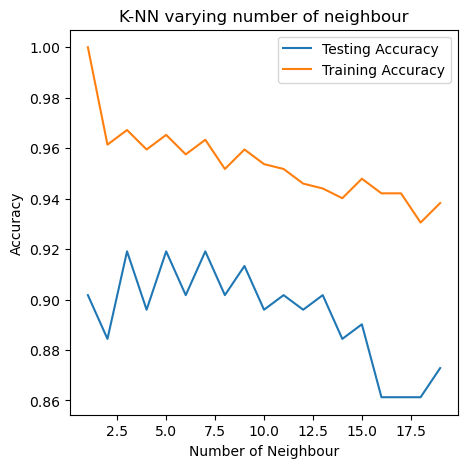

In [12]:

plt.figure(figsize=(5,5))
plt.title("K-NN varying number of neighbour")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")

plt.legend()
plt.xlabel("Number of Neighbour")
plt.ylabel("Accuracy")
plt.show()

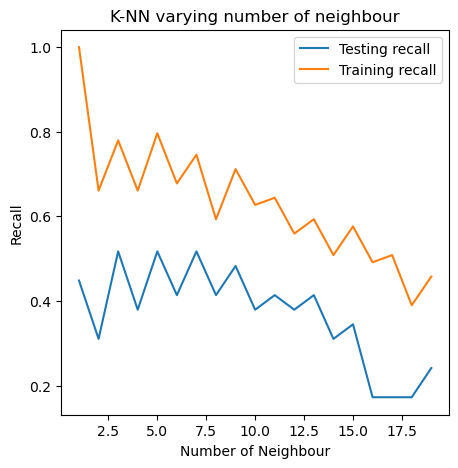

In [13]:
plt.figure(figsize=(5,5))
plt.title("K-NN varying number of neighbour")
plt.plot(neighbors, test_recall, label="Testing recall")
plt.plot(neighbors, train_recall, label="Training recall")
plt.legend()
plt.xlabel("Number of Neighbour")
plt.ylabel("Recall")
plt.show()

### Comment: the maximum test accuracy available is about 92% and maximum recall is about 50% with low variation for k in range 3 to 7

## we will use GridSearch cross validation to check for best k value

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [{ 'n_neighbors': [ 3, 4, 5,6,7,8 ]}] ## trying for 3 4 5 6 7 8 K neighbours 

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid,scoring='accuracy', cv=10)## number of cross  folds is 10
grid_search.fit(X_validation, y_validation.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8]}],
             scoring='accuracy')

In [15]:
## lets see best found parametrs
grid_search.best_params_

{'n_neighbors': 5}

In [16]:
## accuracy of best found model in training
grid_search.best_score_

0.9127450980392158

##  accuracy of fitting  cross validation set is 91.2% with k = 5  lets check the test set  🤔 

In [17]:
grid_search.best_estimator_.fit(X_train, y_train.values.ravel())
tuned_accuracy = grid_search.score(X_test, y_test.values.ravel())
tuned_accuracy

0.9190751445086706

## Test set accuracy is 91.9% which is much higher than base line and as close to maximum possible test accuracy🥳

In [18]:
y_pred = grid_search.predict(X_test)
y_predt = grid_search.predict(X_train)

In [19]:

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train,y_predt) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_predt)}\n")
print(f"recall_score: \n{recall_score(y_train, y_predt)}%")
print(f"precision_score: \n{precision_score(y_train, y_predt)}%")
print(f"f1-score: \n{f1_score(y_train, y_predt)}%")
print("Test Result:\n================================================")  
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"recall_score: \n{recall_score(y_test, y_pred)}%")
print(f"precision_score: \n{precision_score(y_test, y_pred)}%")
print(f"f1-score: \n{f1_score(y_test, y_pred)}%")

Train Result:
Accuracy Score: 96.53%
Confusion Matrix: 
 [[453   6]
 [ 12  47]]

recall_score: 
0.7966101694915254%
precision_score: 
0.8867924528301887%
f1-score: 
0.8392857142857143%
Test Result:
Number of mislabeled points out of a total 173 points : 14
Accuracy Score: 91.91%
Confusion Matrix: 
 [[144   0]
 [ 14  15]]

recall_score: 
0.5172413793103449%
precision_score: 
1.0%
f1-score: 
0.6818181818181819%


In [20]:


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

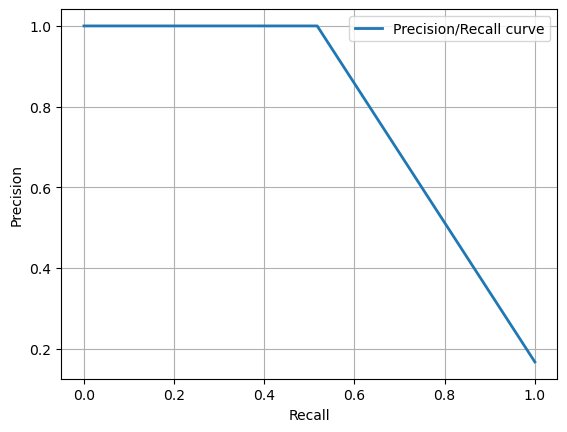

In [21]:
# percision and recall
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

### 2. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train.values.ravel())
y_pred = lr_clf.predict(X_test)
y_predt = lr_clf.predict(X_train)
y_predv = lr_clf.predict(X_validation)

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train,y_predt) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_predt)}\n")
print(f"recall_score: \n{recall_score(y_train, y_predt)}%")
print(f"precision_score: \n{precision_score(y_train, y_predt)}%")
print(f"f1-score: \n{f1_score(y_train, y_predt)}%")
print("Test Result:\n================================================")   
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"recall_score: \n{recall_score(y_test, y_pred)}%")
print(f"precision_score: \n{precision_score(y_test, y_pred)}%")
print(f"f1-score: \n{f1_score(y_test, y_pred)}%")


Train Result:
Accuracy Score: 97.10%
Confusion Matrix: 
 [[455   4]
 [ 11  48]]

recall_score: 
0.8135593220338984%
precision_score: 
0.9230769230769231%
f1-score: 
0.8648648648648649%
Test Result:
Number of mislabeled points out of a total 173 points : 16
Accuracy Score: 90.75%
Confusion Matrix: 
 [[142   2]
 [ 14  15]]

recall_score: 
0.5172413793103449%
precision_score: 
0.8823529411764706%
f1-score: 
0.6521739130434783%


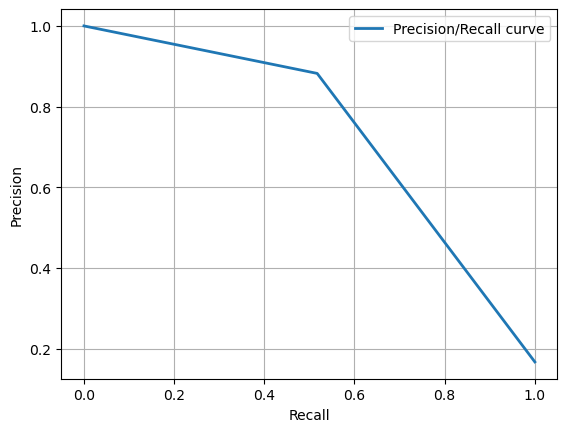

In [24]:
# percision and recall

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

### 3. Naive Bayes
- Naive Gaussian Classifier
- Multinomial Naïve Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train.values.ravel())


GaussianNB()

In [26]:
y_pred = model.predict(X_test)
y_predt = model.predict(X_train)

In [27]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))


Number of mislabeled points out of a total 173 points : 27


In [28]:

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train,y_predt) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_predt)}\n")
print(f"recall_score: \n{recall_score(y_train, y_predt)}%")
print(f"precision_score: \n{precision_score(y_train, y_predt)}%")
print(f"f1-score: \n{f1_score(y_train, y_predt)}%")
print("Test Result:\n================================================")    
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"recall_score: \n{recall_score(y_test, y_pred)}%")
print(f"precision_score: \n{precision_score(y_test, y_pred)}%")
print(f"f1-score: \n{f1_score(y_test, y_pred)}%")


Train Result:
Accuracy Score: 68.34%
Confusion Matrix: 
 [[296 163]
 [  1  58]]

recall_score: 
0.9830508474576272%
precision_score: 
0.26244343891402716%
f1-score: 
0.4142857142857143%
Test Result:
Number of mislabeled points out of a total 173 points : 27
Accuracy Score: 84.39%
Confusion Matrix: 
 [[119  25]
 [  2  27]]

recall_score: 
0.9310344827586207%
precision_score: 
0.5192307692307693%
f1-score: 
0.6666666666666666%


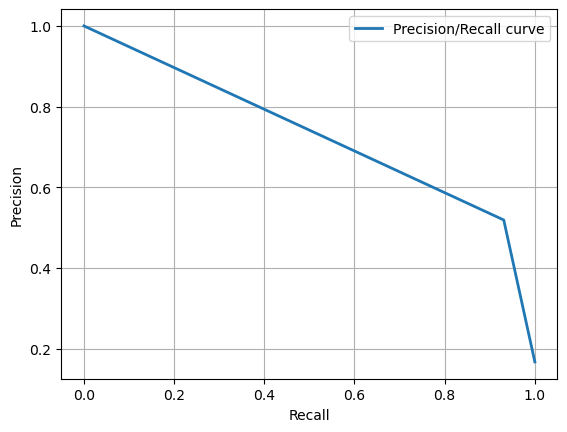

In [29]:
# percision and recall

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

## 4. Decision Trees

## For measuring impurity we will use each of the following:
 
- gini-index 
- entropy for measuring impurity

In [30]:
from sklearn import tree

### 1- gini-index 

In [56]:
 clf = tree.DecisionTreeClassifier(criterion='gini',splitter='random',random_state=0)

In [57]:
 clf = clf.fit(X_train, y_train.values.ravel())

## Now we will plot the tree using graphviz for better visualization

### Hint: use the following to install graphviz
conda install python-graphviz

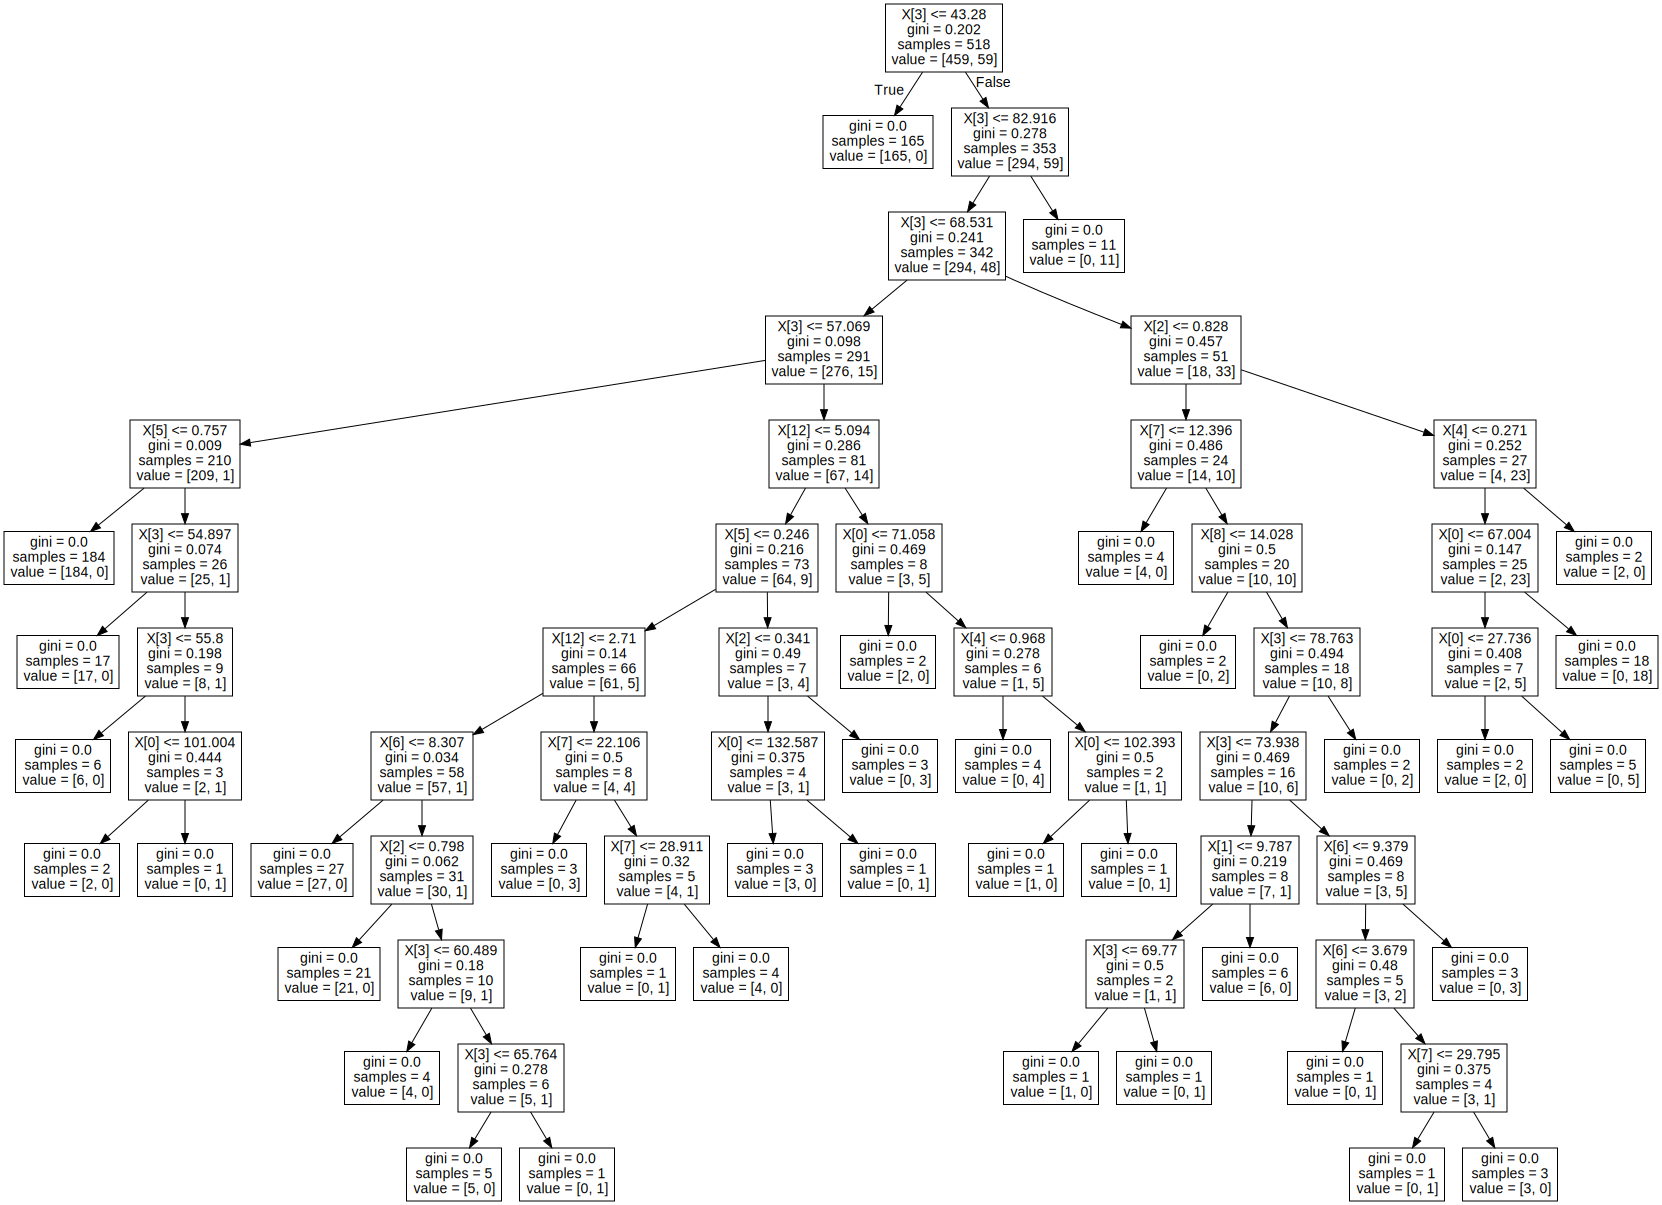

In [62]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph 

In [63]:
y_pred = clf.predict(X_test)
y_predt = clf.predict(X_train)

Number of mislabeled points out of a total 173 points : 10
Train Result:
Accuracy Score: 100.00%
Confusion Matrix: 
 [[459   0]
 [  0  59]]

recall_score: 
1.0%
precision_score: 
1.0%
f1-score: 
1.0%
Test Result:
Number of mislabeled points out of a total 173 points : 10
Accuracy Score: 94.22%
Confusion Matrix: 
 [[143   1]
 [  9  20]]

recall_score: 
0.6896551724137931%
precision_score: 
0.9523809523809523%
f1-score: 
0.7999999999999999%


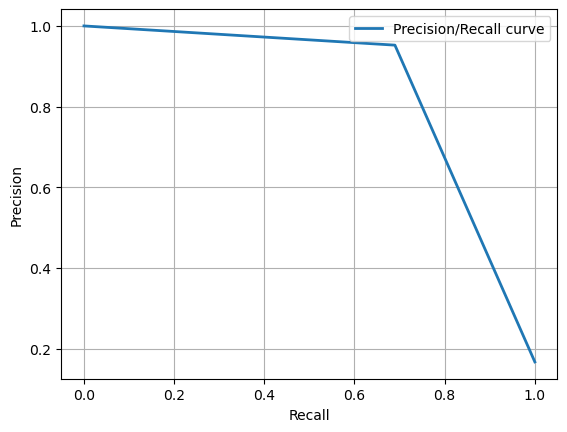

In [64]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))



print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train,y_predt) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_predt)}\n")
print(f"recall_score: \n{recall_score(y_train, y_predt)}%")
print(f"precision_score: \n{precision_score(y_train, y_predt)}%")
print(f"f1-score: \n{f1_score(y_train, y_predt)}%")
print("Test Result:\n================================================")    
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"recall_score: \n{recall_score(y_test, y_pred)}%")
print(f"precision_score: \n{precision_score(y_test, y_pred)}%")
print(f"f1-score: \n{f1_score(y_test, y_pred)}%")


# percision and recall

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

## Comment: model have percsion of 95.2% at 68.9% recall

### 1- Entropy

In [78]:
 clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=0)

In [79]:
 clf = clf.fit(X_train, y_train.values.ravel())

## Now we will plot the tree using graphviz for better visualization

### Hint: use the following to install graphviz
conda install python-graphviz

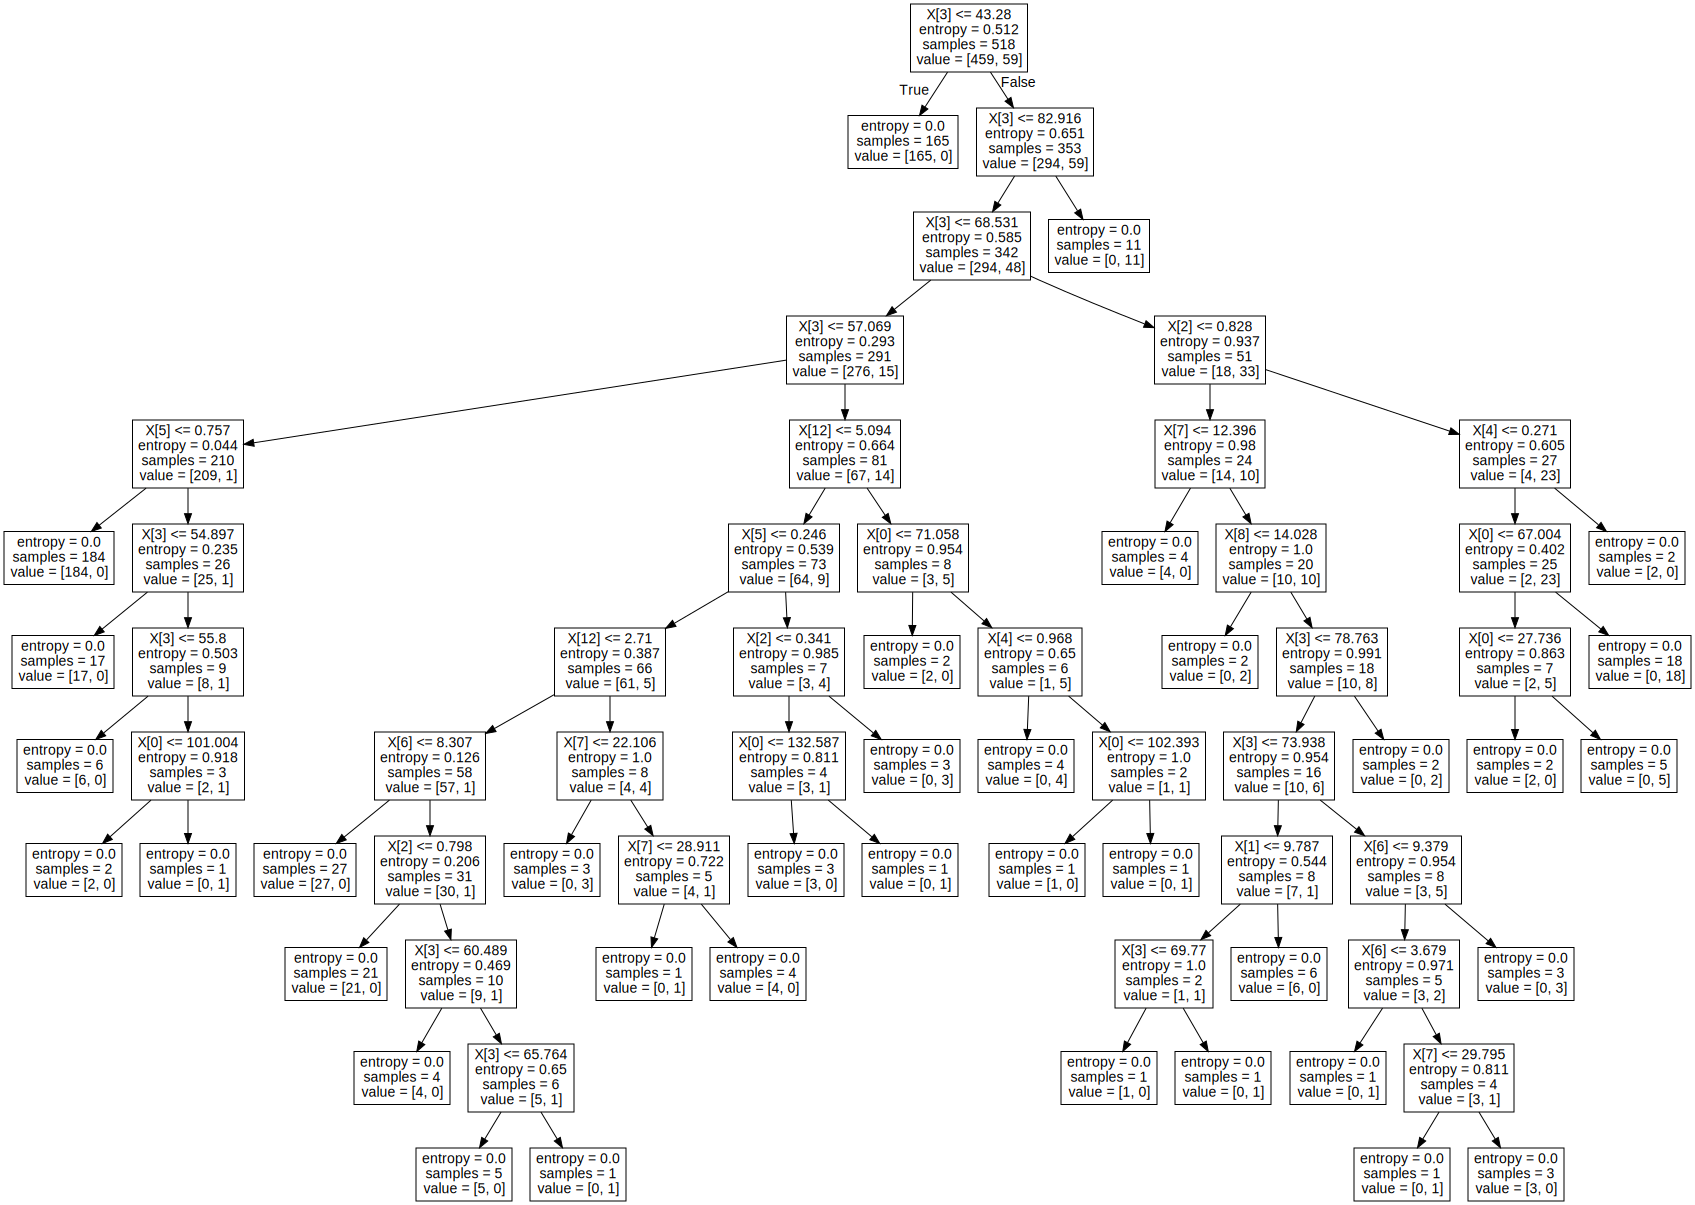

In [81]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph 

In [82]:
y_pred = clf.predict(X_test)
y_predt = clf.predict(X_train)

Number of mislabeled points out of a total 173 points : 10
Train Result:
Accuracy Score: 100.00%
Confusion Matrix: 
 [[459   0]
 [  0  59]]

recall_score: 
1.0%
precision_score: 
1.0%
f1-score: 
1.0%
Test Result:
Number of mislabeled points out of a total 173 points : 10
Accuracy Score: 94.22%
Confusion Matrix: 
 [[143   1]
 [  9  20]]

recall_score: 
0.6896551724137931%
precision_score: 
0.9523809523809523%
f1-score: 
0.7999999999999999%


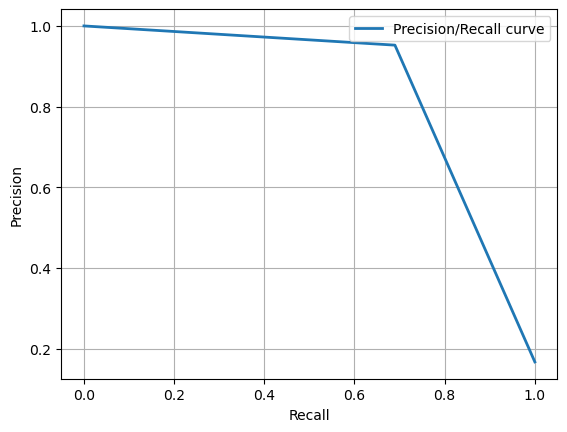

In [83]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))



print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train,y_predt) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_predt)}\n")
print(f"recall_score: \n{recall_score(y_train, y_predt)}%")
print(f"precision_score: \n{precision_score(y_train, y_predt)}%")
print(f"f1-score: \n{f1_score(y_train, y_predt)}%")
print("Test Result:\n================================================")    
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"recall_score: \n{recall_score(y_test, y_pred)}%")
print(f"precision_score: \n{precision_score(y_test, y_pred)}%")
print(f"f1-score: \n{f1_score(y_test, y_pred)}%")


# percision and recall

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

## Comment: model have percsion of 95.2% at 68.9% recall exactly the same as gini-index as expected

## 5. Support Vector Machines

In [94]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [105]:
 clf = svm.SVC(kernel="linear", gamma=2)

In [106]:
 clf = clf.fit(X_train, y_train.values.ravel())

## printing the suport vectors for each class

In [108]:
# get support vectors
clf.support_vectors_

array([[ 33.,   8.,   1.,  63.,   0.,   1.,  14.,  31.,  19.,  12.,   3.,
          1.,   7.],
       [ 33.,   8.,   0.,  62.,   0.,   1.,  14.,  31.,  19.,  12.,   3.,
          1.,  12.],
       [ 99.,   8.,   0.,  64.,   1.,   0.,  14.,  31.,  19.,  12.,   3.,
          1.,  10.],
       [ 13.,   8.,   0.,  69.,   1.,   0.,  14.,  31.,  19.,  12.,   3.,
          1.,  12.],
       [ 18.,  11.,   1.,  72.,   0.,   0.,  14.,  31.,  19.,  12.,   3.,
          1.,   0.],
       [128.,  18.,   1.,  55.,   0.,   0.,   6.,   0.,   3.,  12.,   3.,
          1.,   8.],
       [128.,  18.,   1.,  65.,   0.,   0.,   6.,  13.,  19.,  12.,   3.,
          1.,   0.],
       [ 78.,  18.,   1.,  65.,   0.,   0.,   6.,   7.,   8.,  12.,   3.,
          1.,   1.],
       [ 78.,  18.,   0.,  75.,   0.,   0.,   6.,  31.,  19.,  12.,   3.,
          1.,   0.],
       [ 97.,  18.,   0.,  75.,   0.,   0.,   6.,   7.,  19.,  12.,   3.,
          1.,   1.],
       [ 78.,  18.,   0.,  75.,   0.,   0.,   6., 

In [109]:
# get indices of support vectors
clf.support_

array([ 41,  42, 118, 133, 183, 216, 226, 281, 287, 301, 317, 318, 322,
       338, 361, 368, 385, 427, 488, 489,  14,  32, 104, 120, 128, 194,
       218, 249, 250, 267, 271, 288, 293, 325, 326, 349, 394, 412, 479,
       511, 517])

In [110]:
# get number of support vectors for each class
clf.n_support_

array([20, 21])

In [111]:
y_pred = clf.predict(X_test)
y_predt = clf.predict(X_train)

Number of mislabeled points out of a total 173 points : 12
Train Result:
Accuracy Score: 97.49%
Confusion Matrix: 
 [[455   4]
 [  9  50]]

recall_score: 
0.847457627118644%
precision_score: 
0.9259259259259259%
f1-score: 
0.8849557522123893%
Test Result:
Number of mislabeled points out of a total 173 points : 12
Accuracy Score: 93.06%
Confusion Matrix: 
 [[143   1]
 [ 11  18]]

recall_score: 
0.6206896551724138%
precision_score: 
0.9473684210526315%
f1-score: 
0.75%


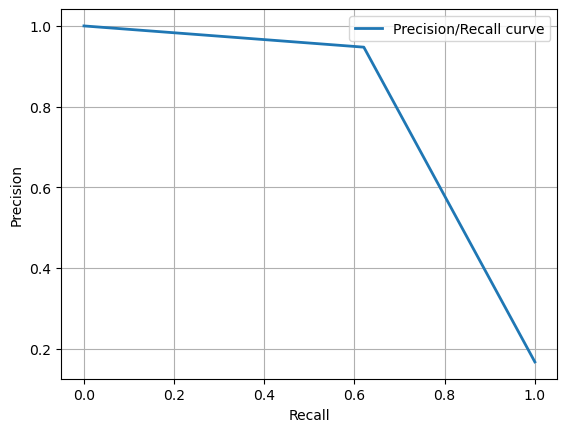

In [112]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))



print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train,y_predt) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_predt)}\n")
print(f"recall_score: \n{recall_score(y_train, y_predt)}%")
print(f"precision_score: \n{precision_score(y_train, y_predt)}%")
print(f"f1-score: \n{f1_score(y_train, y_predt)}%")
print("Test Result:\n================================================")    
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"recall_score: \n{recall_score(y_test, y_pred)}%")
print(f"precision_score: \n{precision_score(y_test, y_pred)}%")
print(f"f1-score: \n{f1_score(y_test, y_pred)}%")


# percision and recall

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

## Comment: model have percsion of 94.7% at 62% recall

# Summary of all models
# 


In [148]:
from sklearn.metrics import classification_report
Models= { 
    "knn": grid_search,
    "LR": LogisticRegression(solver='liblinear'),
    "NB": GaussianNB(),
    "DT":tree.DecisionTreeClassifier(criterion='gini',splitter='random',random_state=0),
    "SVM":svm.SVC(kernel="linear",probability=True, gamma=2)
}
prediction = {}
for model_name, model in Models.items():
    fitted_model= model.fit(X_train, y_train.values.ravel())
    prediction[model_name]= fitted_model.predict(X_test)
    print(f"{model_name}: { round(model.score(X_test, y_test.values.ravel()),4)*100} %")
    print(classification_report(prediction[model_name],y_test.values.ravel()))  
    print(f"f1-score: {f1_score(y_test, prediction[model_name])}%")

knn: 91.91 %
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       158
           1       0.52      1.00      0.68        15

    accuracy                           0.92       173
   macro avg       0.76      0.96      0.82       173
weighted avg       0.96      0.92      0.93       173

f1-score: 0.6818181818181819%
LR: 90.75 %
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       156
           1       0.52      0.88      0.65        17

    accuracy                           0.91       173
   macro avg       0.75      0.90      0.80       173
weighted avg       0.94      0.91      0.92       173

f1-score: 0.6521739130434783%
NB: 84.39 %
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       121
           1       0.93      0.52      0.67        52

    accuracy                           0.84       173
   macro avg       0.88      0.

# From F1-score Descion tree  is the best algorithm regarding persion/recall relation then SVM all the others have very close F1-score

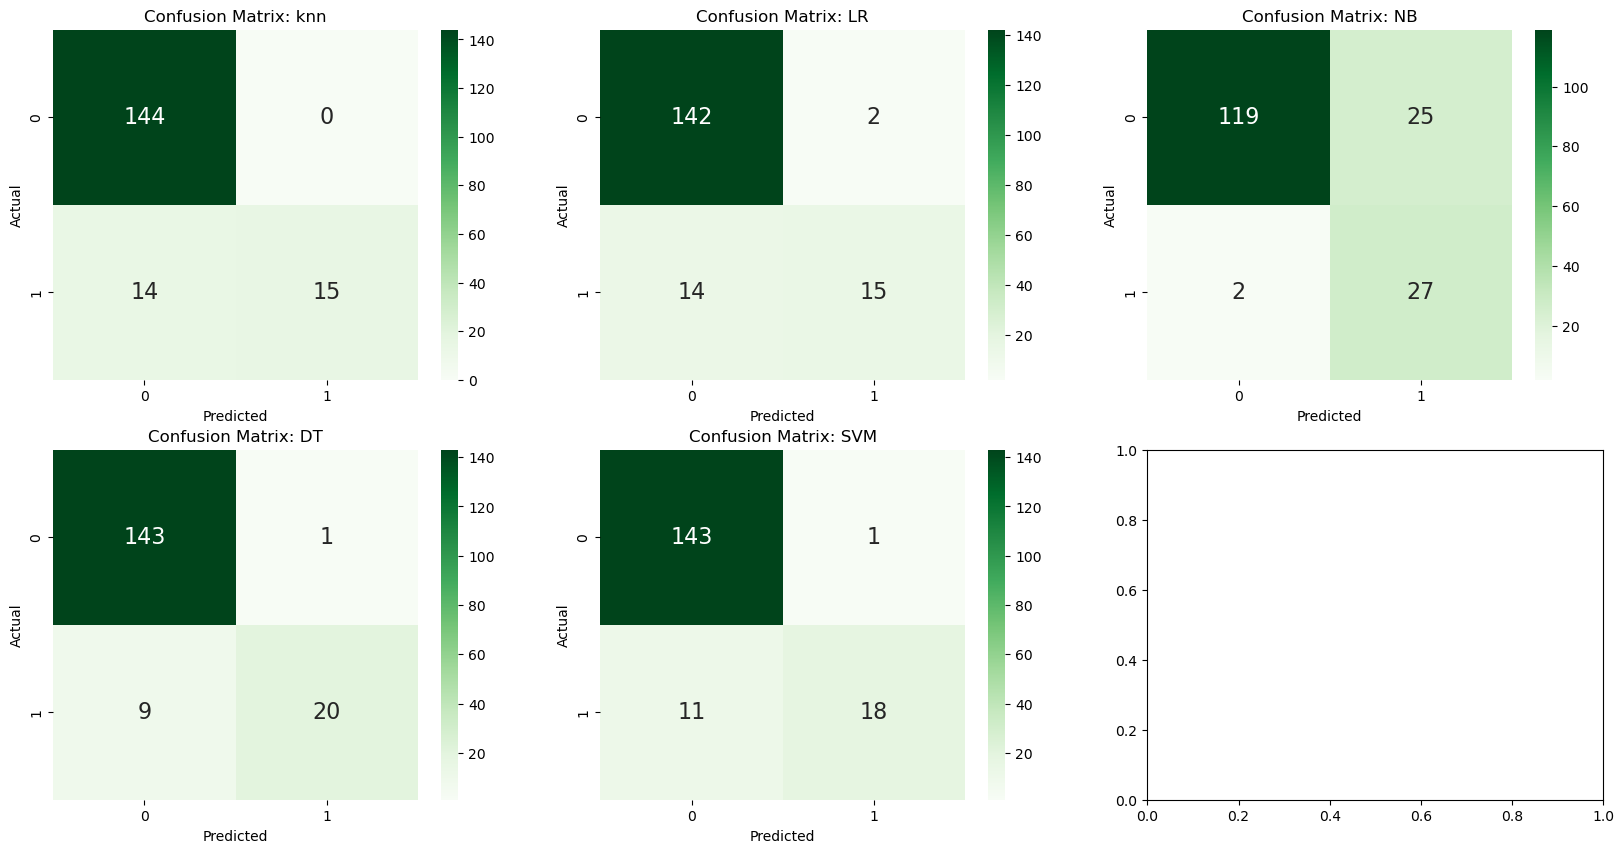

In [149]:
fig, axes= plt.subplots(2, 3, figsize= (20, 10))
for (model_name, predicted_labels), ax in zip(prediction.items(), axes.flatten()):
    cm= confusion_matrix(y_test, predicted_labels)
    sns.heatmap(cm, annot= True, annot_kws= {"size": 16}, fmt= "d", cmap= "Greens", ax= ax)
    ax.set(title= f"Confusion Matrix: {model_name}", xlabel="Predicted", ylabel="Actual")
plt.show()

# From confusion Matrix: Desicion  Tree has high perscion while maintaing accrptable recall but Naive bayes has high recall while maintaing acceptable percisin all the other models have very high percision but relatively low recall

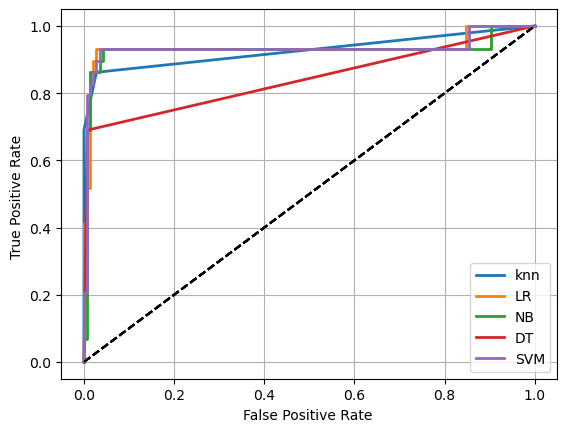

In [150]:
from sklearn.metrics import plot_roc_curve


for (model_name, model), ax in zip(Models.items(), axes.flatten()):
    fitted_model= model.fit(X_train, y_train.values.ravel())
    prediction[model_name]= fitted_model.predict_proba(X_test)
    prediction[model_name]=prediction[model_name][:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, prediction[model_name])
    plt.plot(fpr, tpr, linewidth=2, label=model_name)
    plt.grid()
    plt.plot([0, 1], [0, 1], "k--")
    
    plt.xlabel('False Positive Rate ')
    plt.ylabel('True Positive Rate ')
    plt.legend()
    

plt.show()

#  From ROC curve if high tpr is required then naive bayes , Logestic regresion or SVM is better but if low fpr is more important then Knn or decision trees is better



In [151]:
from sklearn.metrics import roc_auc_score

for (model_name, model), ax in zip(Models.items(), axes.flatten()):
    fitted_model= model.fit(X_train, y_train.values.ravel())
    prediction[model_name]= fitted_model.predict_proba(X_test)
    
    prediction[model_name]=prediction[model_name][:, 1]
    auc = roc_auc_score(y_test, prediction[model_name])
    print(model_name + ' auc  is: ')
    print(auc)

knn auc  is: 
0.9267241379310345
LR auc  is: 
0.9343869731800766
NB auc  is: 
0.9284003831417625
DT auc  is: 
0.8413553639846744
SVM auc  is: 
0.9336685823754788


# From AUC all models have high nearly equivalent auc which means all  of them are efficient🥳